In [1]:
#Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

In [2]:
#import data
df = pd.DataFrame(pd.read_csv(r'..\Project\CarPrice.csv'))
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#car_ID is not needed
df.drop(columns=["car_ID"], axis=1, inplace=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


We had 26 columns and 205 rows in the data. we dropped column "Car ID" as it is not needed for analysis

<Axes: xlabel='price', ylabel='Count'>

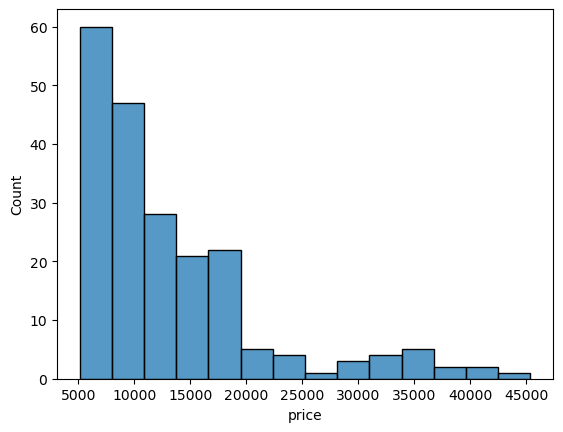

In [4]:
#let's plot the price to see distibution
sns.histplot(df['price'])

from the graph, we can see that distribution of the price  is right-skewed. which suggest that log-linear regression model might  fit better in comparison to simple linear regression

In [5]:
df.CarName.values[0:10]
df['Brand'] = df.CarName.str.split(' ').str.get(0).str.upper()
df['Model'] = df.CarName.str.split(' ').str.get(1).str.upper()
len(set(df.Brand.values))
df.drop(columns=["CarName"], axis=1, inplace=True)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,Model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA,ROMERO
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA,ROMERO
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA,ROMERO
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI,100LS
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI,100LS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,114,5400,23,28,16845.0,VOLVO,145E(SW)
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,VOLVO,144EA
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.58,2.87,8.8,134,5500,18,23,21485.0,VOLVO,244DL
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3.01,3.40,23.0,106,4800,26,27,22470.0,VOLVO,246


In [6]:
df.Brand.unique()


array(['ALFA', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA', 'ISUZU',
       'JAGUAR', 'MAXDA', 'MAZDA', 'BUICK', 'MERCURY', 'MITSUBISHI',
       'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE', 'PORCSHCE', 'RENAULT',
       'SAAB', 'SUBARU', 'TOYOTA', 'TOYOUTA', 'VOKSWAGEN', 'VOLKSWAGEN',
       'VW', 'VOLVO'], dtype=object)

In [7]:
# We have 5 car brand names which is spelled incorrectly. 
Brand_dict = {
    'TOYOUTA': 'TOYOTA',
    'MAXDA': 'MAZDA',
    'PORSCHE': 'PORCSHCE',
    'VOKSWAGEN': 'VOLKSWAGEN',
    'VW': 'VOLKSWAGEN',
}

# Correcting brand name in dataframe
df['Brand'] = df['Brand'].map(Brand_dict).fillna(df['Brand'])
# Let's test again if all corrected
df.Brand.unique()

array(['ALFA', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA', 'ISUZU',
       'JAGUAR', 'MAZDA', 'BUICK', 'MERCURY', 'MITSUBISHI', 'NISSAN',
       'PEUGEOT', 'PLYMOUTH', 'PORCSHCE', 'RENAULT', 'SAAB', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [8]:
df['RiskRate'] = df['symboling'].apply(lambda x : "High Risk" if x > 1 
                                                     else ("Medium Risk" if 0 <= x <= 1
                                                        else "Low Risk"))
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,Model,RiskRate
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,13495.0,ALFA,ROMERO,High Risk
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,16500.0,ALFA,ROMERO,High Risk
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,3.47,9.0,154,5000,19,26,16500.0,ALFA,ROMERO,Medium Risk
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.40,10.0,102,5500,24,30,13950.0,AUDI,100LS,High Risk
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.40,8.0,115,5500,18,22,17450.0,AUDI,100LS,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.15,9.5,114,5400,23,28,16845.0,VOLVO,145E(SW),Low Risk
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,3.15,8.7,160,5300,19,25,19045.0,VOLVO,144EA,Low Risk
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,2.87,8.8,134,5500,18,23,21485.0,VOLVO,244DL,Low Risk
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3.40,23.0,106,4800,26,27,22470.0,VOLVO,246,Low Risk


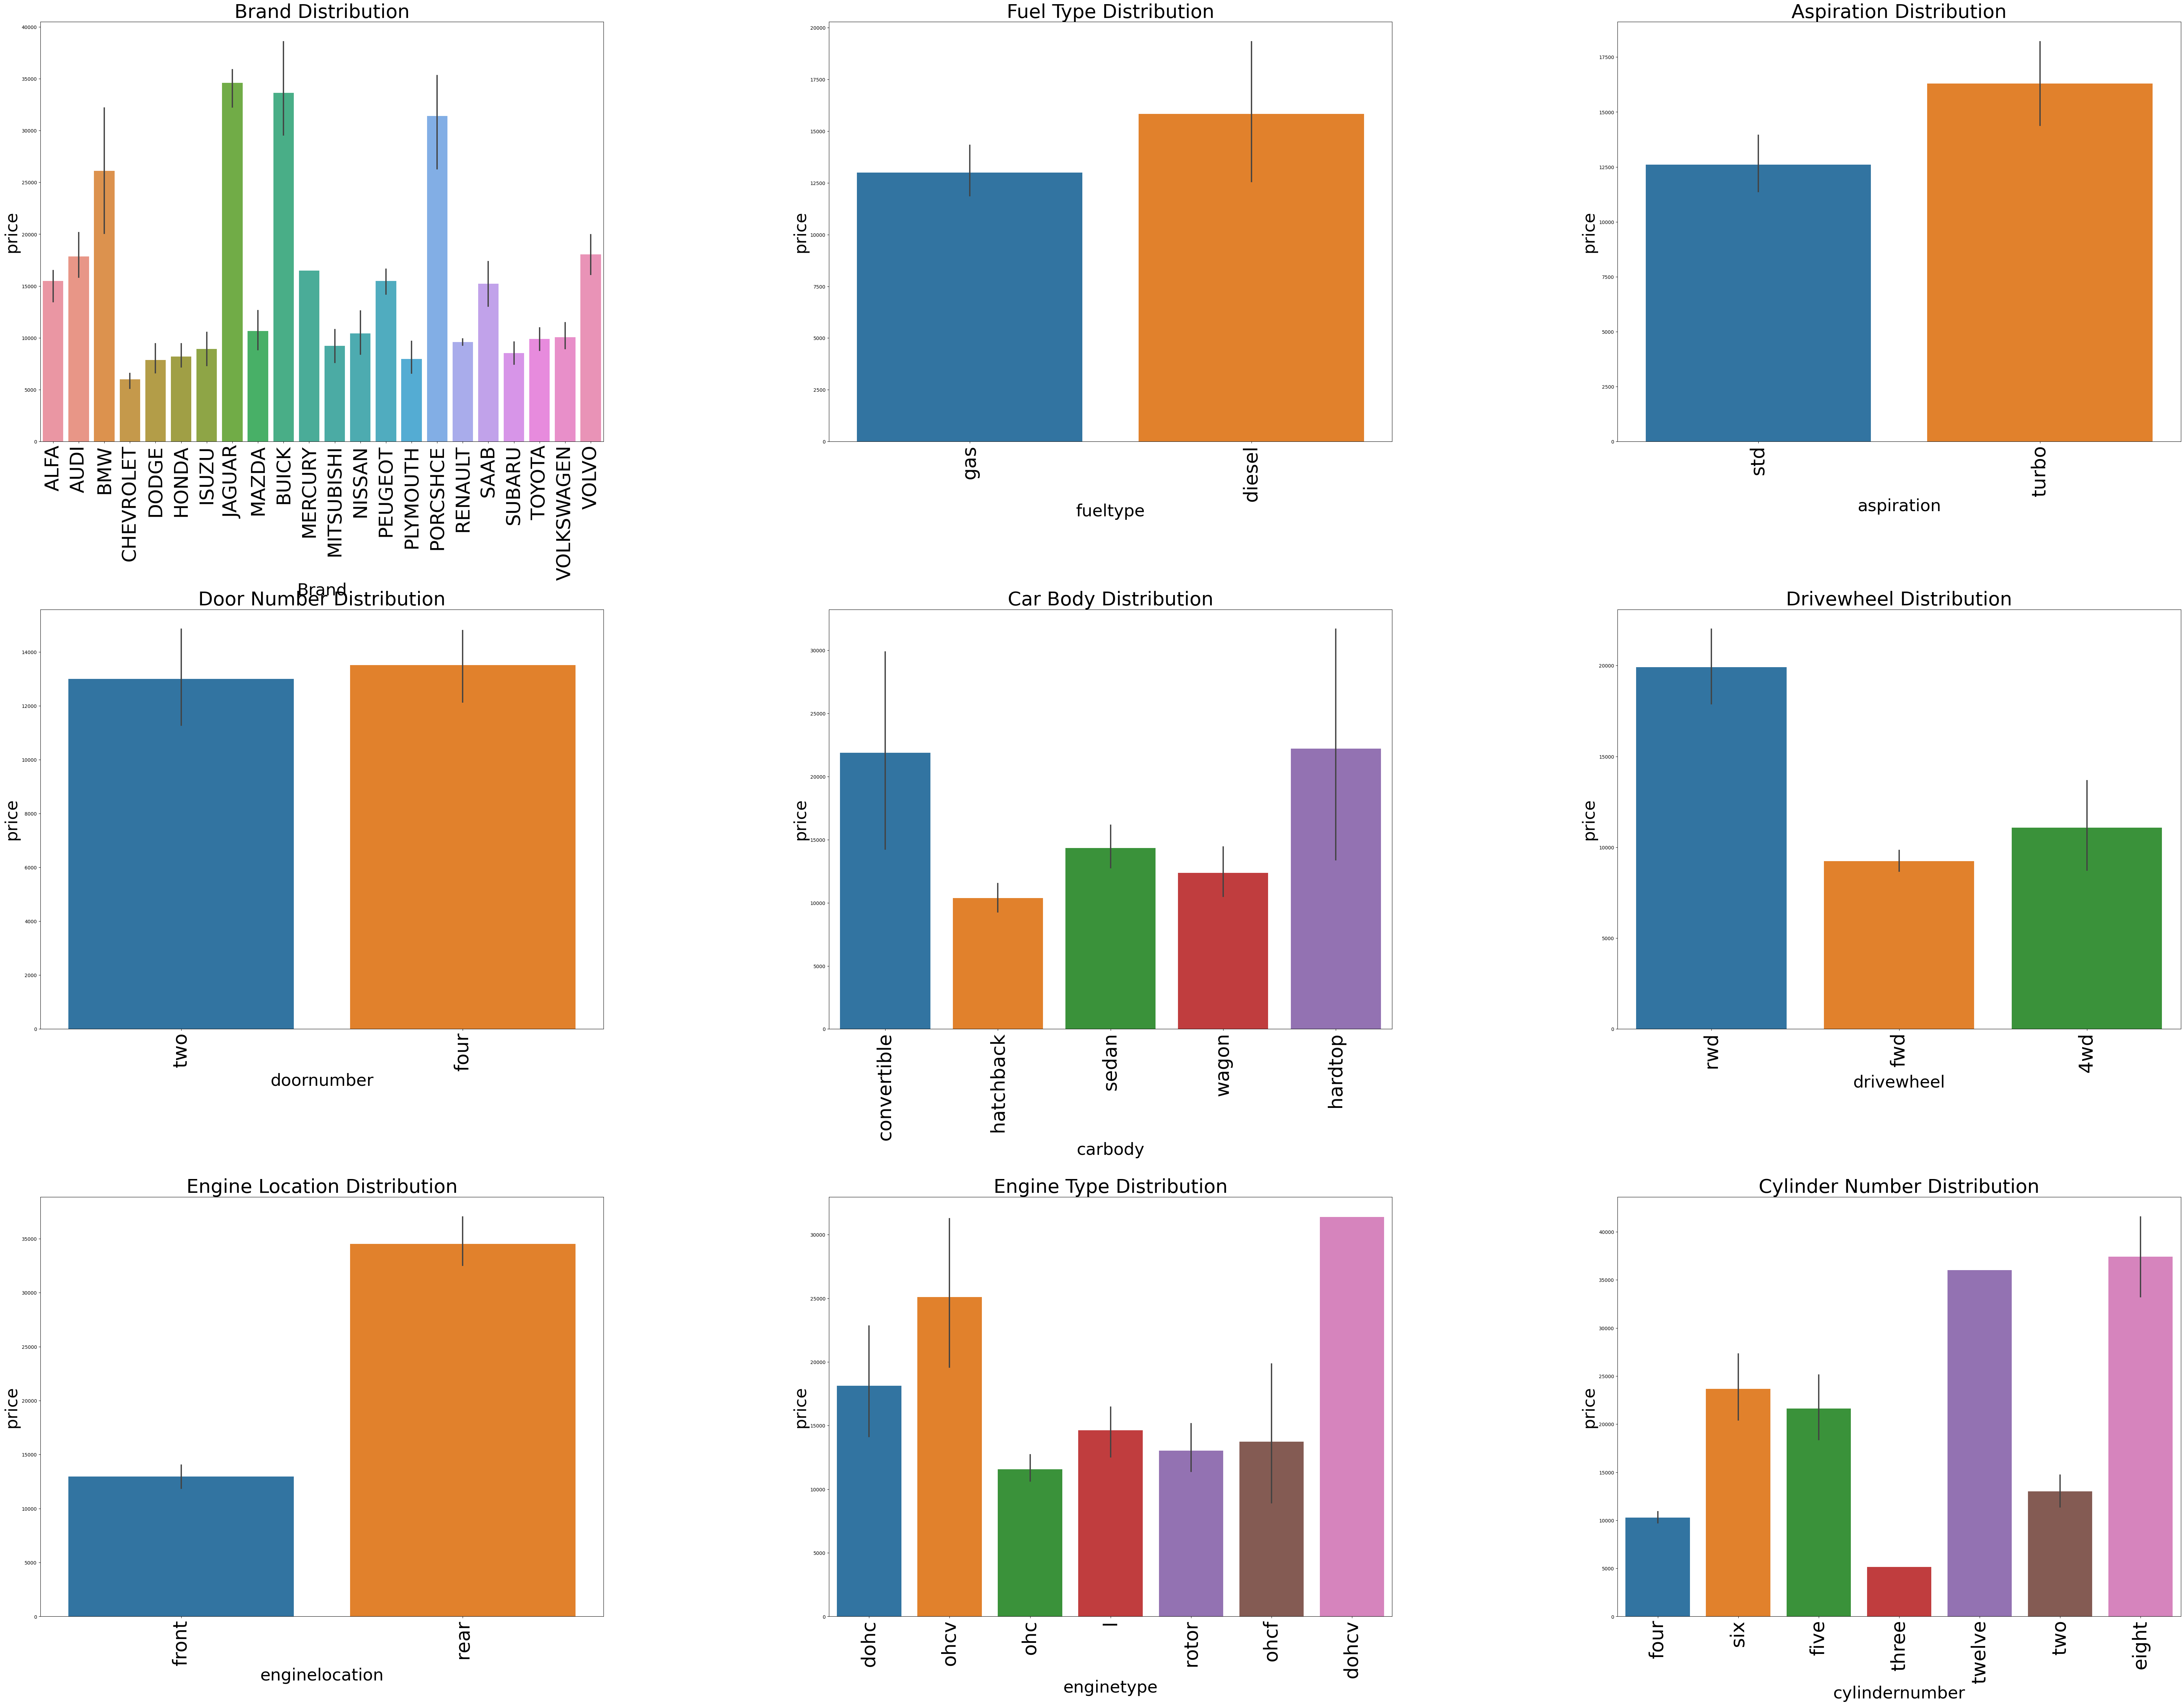

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(80, 60))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

charts = [
    {'title': "Brand Distribution", 'x': 'Brand', 'y': 'price'},
    {'title': "Fuel Type Distribution", 'x': 'fueltype', 'y': 'price'},
    {'title': "Aspiration Distribution", 'x': 'aspiration', 'y': 'price'},
    {'title': "Door Number Distribution", 'x': 'doornumber', 'y': 'price'},
    {'title': "Car Body Distribution", 'x': 'carbody', 'y': 'price'},
    {'title': "Drivewheel Distribution", 'x': 'drivewheel', 'y': 'price'},
    {'title': "Engine Location Distribution", 'x': 'enginelocation', 'y': 'price'},
    {'title': "Engine Type Distribution", 'x': 'enginetype', 'y': 'price'},
    {'title': "Cylinder Number Distribution", 'x': 'cylindernumber', 'y': 'price'},
    {'title': "Fuel System Distribution", 'x': 'fuelsystem', 'y': 'price'},
    {'title': "Risk Rate Distribution", 'x': 'RiskRate', 'y': 'price'}
]

counter = 0

for i in range(3):
    for j in range(3):
        if counter < len(charts):
            chart = charts[counter]
            plt.subplot(3, 3, counter+1)
            plt.title(chart['title'], fontsize=40)
            sns.barplot(x=chart['x'], y=chart['y'], data=df)
            plt.xlabel(chart['x'], fontsize=35)
            plt.ylabel(chart['y'], fontsize=35)
            plt.xticks(fontsize=40, rotation=90)
        else:
            axes[i, j].axis('off')
        counter += 1


plt.rcParams['figure.figsize'] = (190, 180)

plt.show()


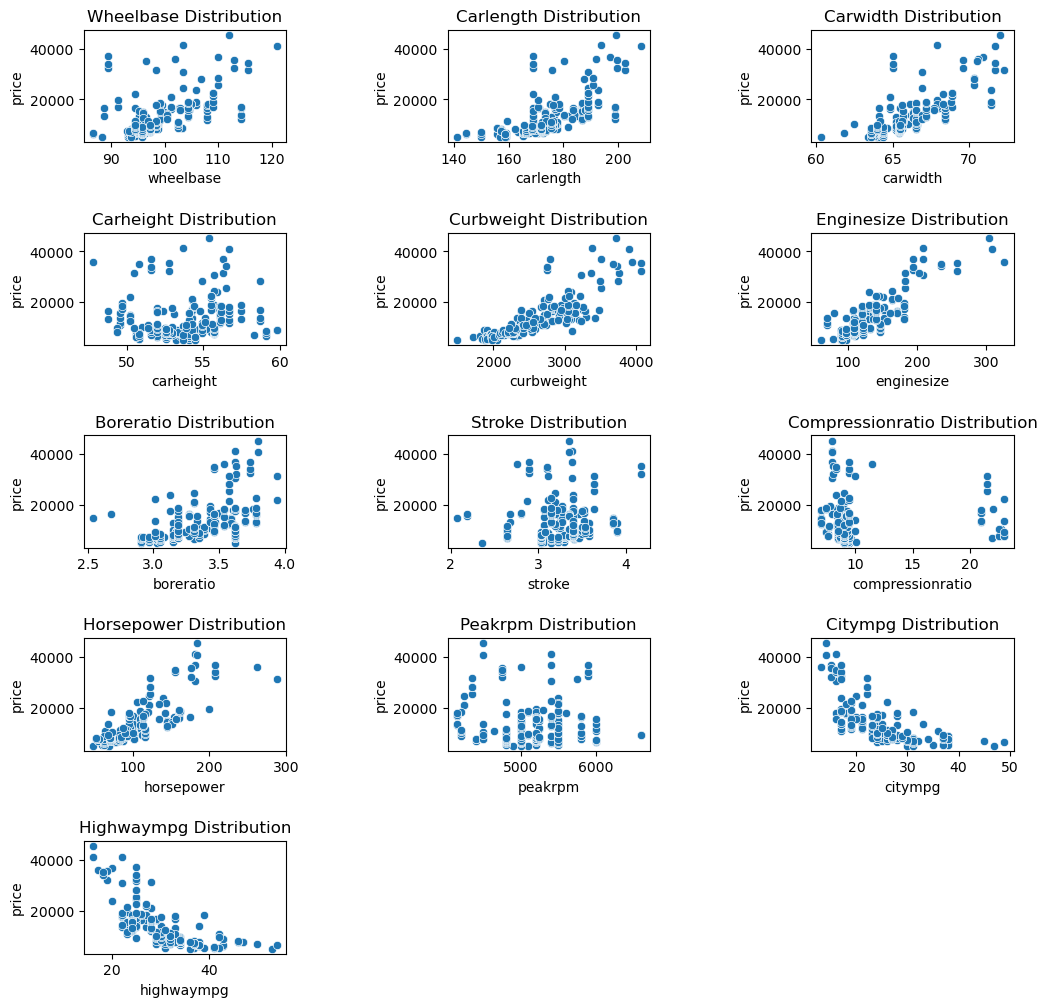

In [10]:

columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
           'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
           'citympg', 'highwaympg']


num_plots = len(columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
plt.subplots_adjust(hspace=0.8)
plt.subplots_adjust(wspace=0.8)

for i, col in enumerate(columns):
    row = i // num_cols
    col = df[col]  
    
    ax = axes[row, i % num_cols]
    ax.set_title(col.name.capitalize() + " Distribution")
    sns.scatterplot(x=col, y='price', data=df, ax=ax)


if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        fig.delaxes(axes[-1, j])


plt.show()


C:\Users\Arshad\AppData\Local\Temp\ipykernel_14668\2216195962.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")


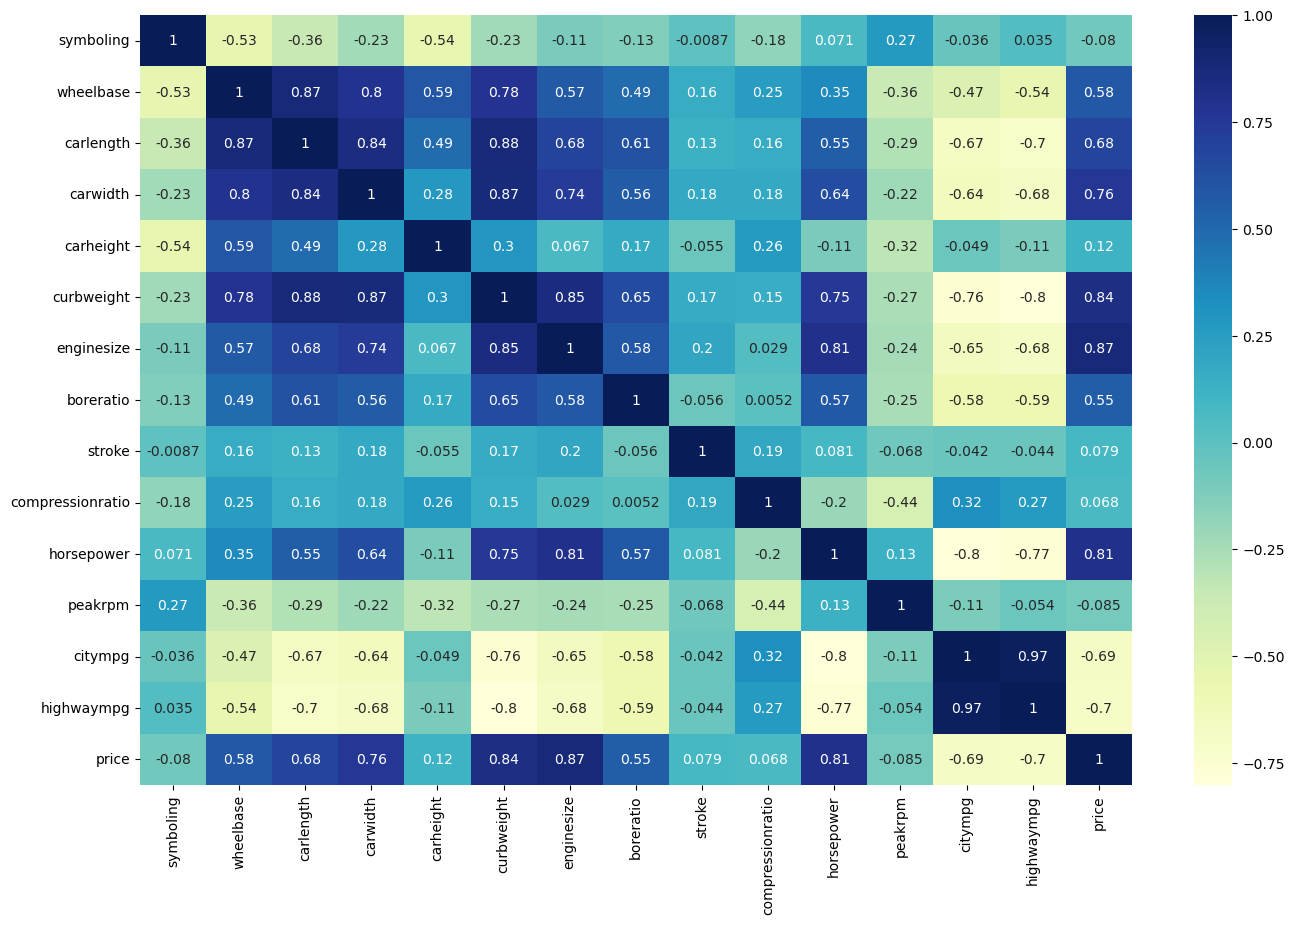

In [11]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

As it seems from corellation matrix, there are independent variables which have significant correlation between each other. So using all of them in regression model will mislead the result.


In [12]:
#Outlier treatment of quantitative variables
#listing all the numeric variables in dataframe carprice
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
continues_columns = df.select_dtypes(exclude=['object', 'category']).columns
print("\033[1mCategorical\033[0m")
print(categorical_columns)
print("\033[1mContinues\033[0m")
print(continues_columns)


Categorical
Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'Brand',
       'Model', 'RiskRate'],
      dtype='object')
Continues
Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


In [13]:
#checking for outliers in wheelbase column and removing them 
for column in continues_columns:
    # Calculate the lower and upper boundaries for outliers
    lb = df[column].quantile(0.25) - 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25))
    ub = df[column].quantile(0.75) + 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25))
    
    # Assign highest and lowest values to outliers
    df.loc[df[column] < lb, column] = lb
    df.loc[df[column] > ub, column] = ub

In [19]:
#checking for any NA induction during outlier treatment
df['price'].isnull().sum() # if output is 0, it means there is not any NaN value

0

In [17]:
# OneHotEncoder cateogerical values  
encoder = OneHotEncoder(sparse_output=False)
Edata = encoder.fit_transform(df[categorical_columns])
E_df = pd.DataFrame(Edata, columns=encoder.get_feature_names_out(categorical_columns))

#Scaling the continuous columns
scaler = StandardScaler()
Sdata = scaler.fit_transform(df[continues_columns])
S_df=pd.DataFrame(Sdata, columns=continues_columns)
# Concatenate the encoded data with the numerical data from df
df_fit = pd.concat([S_df, E_df], axis=1)
print(df_fit)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0     1.743470  -1.723005  -0.426521 -0.858695  -2.020417   -0.014566   
1     1.743470  -1.723005  -0.426521 -0.858695  -2.020417   -0.014566   
2     0.133509  -0.717590  -0.231513 -0.184978  -0.543527    0.514882   
3     0.938490   0.185580   0.207256  0.151880   0.235942   -0.420797   
4     0.938490   0.117416   0.207256  0.248125   0.235942    0.516807   
..         ...        ...        ...       ...        ...         ...   
200  -1.476452   1.770387   1.198549  1.451189   0.728239    0.763241   
201  -1.476452   1.770387   1.198549  1.403066   0.728239    0.949992   
202  -1.476452   1.770387   1.198549  1.451189   0.728239    0.878757   
203  -1.476452   1.770387   1.198549  1.451189   0.728239    1.273437   
204  -1.476452   1.770387   1.198549  1.451189   0.728239    0.975021   

     enginesize  boreratio    stroke  compressionratio  ...  Model_X4  \
0      0.160196   0.519071 -2.106623         -0.04

In [20]:
# Let's randomly divide data two part -70% training 30% testing
df_random = df_fit.sample(frac=1, random_state=42)
Div_index = int(0.7 * len(df_random))
train_df = df_random[:Div_index]
test_df = df_random[Div_index:]

In [26]:
#LInear Regression modelling
y = train_df['price']
X = train_df.drop('price', axis=1)
model_1 = sm.OLS(y, X)
result = model_1.fit()

In [36]:
# code need to be reviewed
results_df = pd.DataFrame(columns=['Variable', 'AIC', 'BIC', 'F-Statistic', 'R-Squared', 'Adjusted R-Squared'])

# Initialize the list of variables to consider for the model
variables = train_df.columns.drop('price').tolist()
# Iterate over the variables
var=[]
for variable in variables:
    v_new=[]
    v_new=[v for v in variables if v != variable]
    predictors=[]
    predictors=variable
    for v in v_new:
        predictors = [predictors] + [v]
        var=predictors
    
       
    
print(var)

[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[['RiskRate_Medium Risk', 'symboling'], 'wheelbase'], 'carlength'], 'carwidth'], 'carheight'], 'curbweight'], 'enginesize'], 'boreratio'], 'stroke'], 'compressionratio'], 'horsepower'], 'peakrpm'], 'citympg'], 'highwaympg'], 'fueltype_diesel'], 'fueltype_gas'], 'aspiration_std'], 'aspiration_turbo'], 'doornumber_four'], 'doornumber_two'], 'carbody_convertible'], 'carbody_hardtop'], 'carbody_hatchback'], 'carbody_sedan'], 'carbody_wagon'], 'drivewheel_4wd'], 'drivewheel_fwd'], 'drivewheel_rwd'], 'enginelocation_front'], 'enginelocation_rear'], 'enginetype_dohc'], 'enginetype_dohcv'], 'enginetype_l'], 'enginetype_ohc'], 'enginetype_ohcf'], 'enginetype_ohcv'], 'enginetype_rotor'], 'cylindernumber_eight'], 'cylindernumber_five'], 'cylindernumber_four'], 'cylindernumber_six'], 'cy

In [ ]:

# Add the variable to the model
    predictors = ['price'] + [variable]
    print(predictors)
    X = df[predictors]
    y = df['price']
    model = sm.OLS(y, X).fit()
    
    # Calculate BIC
    bic = model.bic
    
    # Calculate F-statistic
    f_statistic = model.fvalue
    
    # Calculate R-squared
    r_squared = model.rsquared
    
    # Calculate adjusted R-squared
    adjusted_r_squared = model.rsquared_adj
    
    # Store the results in the DataFrame
    results_df = results_df.append({'Variable': variable, 'AIC': model.aic, 'BIC': bic,
                                    'F-Statistic': f_statistic, 'R-Squared': r_squared,
                                    'Adjusted R-Squared': adjusted_r_squared}, ignore_index=True)

# Sort the results DataFrame based on AIC in ascending order
results_df = results_df.sort_values(by='AIC')

# Print the results
print(results_df)

In [ ]:
Model1 =ols('price~wheelbase + carwidth + curbweight + enginesize + compressionratio + '
             '+horsepower + peakrpm + citympg+ C(aspiration)+C(drivewheel)+C(carbody)+C(enginetype)+C(cylindernumber)+C(Brand)+C(RiskRate)', data=df).fit()
Model1.summary()

In [ ]:
Model2 =ols('price~wheelbase + carwidth + curbweight + enginesize + compressionratio + '
             '+horsepower + peakrpm + citympg+ C(aspiration)+C(drivewheel)+C(carbody)+C(enginetype)+C(cylindernumber)+C(Brand, Treatment(reference="SAAB"))+C(RiskRate)', data=df).fit()
Model2.summary()

In [ ]:
Model3 =ols('price~wheelbase + carwidth + curbweight + enginesize + compressionratio + '
             '+horsepower + peakrpm + citympg+ C(aspiration)+C(drivewheel, Treatment(reference="fwd"))+C(carbody)+C(enginetype)+C(cylindernumber)+C(Brand, Treatment(reference="SAAB"))+C(RiskRate)', data=df).fit()
Model3.summary()

In [ ]:
Model4 =ols('price~wheelbase + carwidth + curbweight + enginesize + compressionratio + '
             '+horsepower + peakrpm + citympg+ C(aspiration)+C(drivewheel, Treatment(reference="fwd"))+C(carbody,Treatment(reference="sedan") )+C(enginetype)+C(cylindernumber)+C(Brand, Treatment(reference="SAAB"))+C(RiskRate)', data=df).fit()
Model4.summary()

In [ ]:
Model5 =ols('price~wheelbase + carwidth + curbweight + enginesize + compressionratio + '
             '+horsepower + peakrpm + citympg+ C(aspiration)+C(drivewheel, Treatment(reference="fwd"))+C(carbody,Treatment(reference"sedan", "hatchback"]) )+C(enginetype)+C(cylindernumber)+C(Brand, Treatment(reference="SAAB"))+C(RiskRate)', data=df).fit()
Model5.summary()

In [ ]:
Categorical
Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'Brand',
       'Model', 'RiskRate'],
      dtype='object')
Continues
Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

import pandas as pd
import statsmodels.formula.api as smf

# Assuming 'train_df' is the training DataFrame containing the 'price' (dependent variable), 'categorical1', and 'categorical2' (categorical variables)

# Remove a categorical value from the model
model_1 = smf.ols(formula='price ~ categorical1 + C(categorical2, Treatment(reference="category_to_exclude"))', data=train_df).fit()

# Print the model summary
print(model_1.summary())


In [ ]:
Model13 = ols('price ~ C(Brand) + C(fueltype) +C(aspiration)+C(carbody)+C(drivewheel)+ C(enginelocation)+C(enginetype)+C(cylindernumber)+curbweight+enginesize+horsepower+carwidth+carheight+citympg+highwaympg', data=train_df).fit() 

Model13.summary()
          


In [ ]:
Model23 = ols('np.log(price) ~ C(Brand) + C(fueltype) +C(aspiration)+C(carbody)+C(drivewheel)+ C(enginelocation)+C(enginetype)+C(cylindernumber)+curbweight+enginesize+horsepower+carwidth+carheight+citympg+highwaympg', data=train_df).fit() 

Model23.summary()